# setup

In [1]:
import ROOT

In [2]:
filepath = '/atlas/local/BtagOptimizationNtuples/group.perf-flavtag.410000.PowhegPythiaEvtGen.AOD.e3698_s2997_r8903_r8906.v21-1.db-b5223bf2_Akt4EMTo/group.perf-flavtag.11010668.Akt4EMTo._000001.root'

In [3]:
rootfile = ROOT.TFile(filepath)
roottree = rootfile.Get("bTagAntiKt4EMTopoJets")

In [4]:
import numpy as np
from numpy.lib.recfunctions import stack_arrays
from root_numpy import root2array, root2rec
import glob

In [5]:
data = root2array(filepath)

In [6]:
print type(data) 
branches = data.dtype.names
print len(data.dtype.names) ##check branch size
print data.shape ##check file size

<type 'numpy.ndarray'>
392
(10000,)


In [7]:
data[['jet_pt', 'jet_eta', 'jet_phi', 'jet_m']][10]

(array([ 70776.6171875 ,  57938.40625   ,  37669.26171875,  26972.63867188,
        21267.06054688], dtype=float32), array([-0.72394133, -1.60138965, -0.40687248,  1.65834463,  0.31063646], dtype=float32), array([ 1.36688316,  2.00173163, -1.05585706, -2.65345049,  2.95579219], dtype=float32), array([ 9155.40820312,  6352.765625  ,  7107.81103516,  3075.87695312,
        4137.83398438], dtype=float32))

In [8]:
data = root2array(filepath, selection='jet_pt>25000')
data.shape

(9994,)

In [10]:
import pandas as pd


In [11]:
df = pd.DataFrame(data)

In [12]:
def root2pandas(files_path, tree_name, **kwargs):
    '''
    Args:
    -----
        files_path: a string like './data/*.root', for example
        tree_name: a string like 'bTag_AntiKt4EMTopoJets' corresponding to the name of the folder inside the root 
                   file that we want to open
        kwargs: arguments taken by root2array, such as branches to consider, start, stop, step, etc
    Returns:
    --------    
        output_panda: a pandas dataframe like allbkg_df in which all the info from the root file will be stored
    
    Note:
    -----
        if you are working with .root files that contain different branches, you might have to mask your data
        in that case, return pd.DataFrame(ss.data)
    '''
    # -- create list of .root files to process
    files = glob.glob(files_path)
    
    # -- process ntuples into rec arrays
    ss = stack_arrays([root2array(fpath, tree_name, **kwargs).view(np.recarray) for fpath in files])

    try:
        return pd.DataFrame(ss)
    except Exception:
        return pd.DataFrame(ss.data)

In [13]:
df = root2pandas(filepath,
           'bTag_AntiKt4EMTopoJets', stop=100)

In [14]:
df.to_hdf('test_pd.h5', 'data')

/nfs/slac/g/atlas/u02/makagan/miniconda3/envs/mlenv2/lib/python2.7/site-packages/pandas/core/generic.py:1282: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['jet_trk_jf_Vertex', 'jet_jf_pb', 'jet_jf_pc', 'jet_jf_pu', 'jet_jf_llr', 'jet_jf_m', 'jet_jf_mUncorr', 'jet_jf_efc', 'jet_jf_deta', 'jet_jf_dphi', 'jet_jf_dRFlightDir', 'jet_jf_ntrkAtVx', 'jet_jf_nvtx', 'jet_jf_sig3d', 'jet_jf_nvtx1t', 'jet_jf_n2t', 'jet_jf_VTXsize', 'jet_jf_vtx_chi2', 'jet_jf_vtx_ndf', 'jet_jf_vtx_ntrk', 'jet_jf_vtx_L3D', 'jet_jf_vtx_sig3D', 'jet_jf_phi', 'jet_jf_theta', 'jet_jf_vtx_sigTrans', 'jet_jf_vtx_x', 'jet_jf_vtx_x_err', 'jet_jf_vtx_y', 'jet_jf_vtx_y_err', 'jet_jf_vtx_z', 'jet_jf_vtx_z_err', 'jet_jf_theta_err', 'jet_jf_phi_err', 'nTrk_vtx1', 'mass_first_vtx', 'e_first_vtx', 'e_frac_vtx1', 'closestVtx_L3D', 'JF_Lxy1', 'vtx1_MaxTrkRapidity', 'vtx1_AvgTrkRapidity', 'vtx1_MinTrkRapi

In [15]:
new_df = pd.read_hdf('test_pd.h5', 'data')

In [16]:
new_df

,PV_jf_x,PV_jf_y,PV_jf_z,jet_trk_jf_Vertex,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,...,jet_mu_phi,jet_mu_d0,jet_mu_z0,jet_mu_parent_pdgid,jet_mu_ID_qOverP_var,jet_mu_muonType,jet_mu_fatjet_nMu,jet_mu_fatjet_pTmax_pT,jet_mu_fatjet_pTmax_pTrel,jet_mu_fatjet_pTmax_pTrelFrac
0,-0.493256,-0.510917,1.146830,"[[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1], ...","[-99.0, 0.0518941, -99.0, 0.930684, -99.0, -99...","[-99.0, 0.13598, -99.0, 0.0458473, -99.0, -99....","[-99.0, 0.805425, -99.0, 0.0144145, -99.0, -99...","[-99.0, -2.74217, -99.0, 4.16768, -99.0, -99.0...","[-99.0, 872.603, -99.0, 2366.29, -99.0, -99.0,...","[-99.0, 139.57, -99.0, 1405.33, -99.0, -99.0, ...",...,"[999.0, -2.54643, 999.0, 999.0, 999.0, 999.0, ...","[0.0, -0.023891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.206081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[999.0, 411.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 3.10188e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[999.0, 0.0, 999.0, 999.0, 999.0, 999.0, 999.0...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[999.0, 28922.0, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 5.59544, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 2.98145e-05, 999.0, 999.0, 999.0, 999...."
1,-0.496583,-0.504840,-38.848740,"[[-1, 0, 1, 1, 0, 0, -1, -1, -1, -1], [-1, -1,...","[0.981215, 0.11079, -99.0, 0.377102, 0.0147868]","[0.0091653, 0.178645, -99.0, 0.0478705, 0.0235...","[0.00575483, 0.711489, -99.0, 0.599366, 0.944833]","[5.13875, -1.85973, -99.0, -0.463356, -4.15727]","[3740.23, 681.722, -99.0, 2934.38, 322.982]","[2329.17, 139.57, -99.0, 139.57, 311.904]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
2,-0.503697,-0.503970,-11.959317,"[[-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0237336, 0.0406026, 0.120164, -99.0, -99.0]","[0.0925063, 0.0614678, 0.188967, -99.0, -99.0]","[0.874925, 0.888221, 0.693709, -99.0, -99.0]","[-3.60725, -3.08539, -1.75319, -99.0, -99.0]","[297.572, 559.325, 537.96, -99.0, -99.0]","[139.57, 338.423, 139.57, -99.0, -99.0]",...,"[999.0, 0.708748, 999.0, 999.0, 999.0]","[0.0, -0.0125413, 0.0, 0.0, 0.0]","[0.0, -0.0197916, 0.0, 0.0, 0.0]","[999.0, -511.0, 999.0, 999.0, 999.0]","[0.0, 7.64488e-14, 0.0, 0.0, 0.0]","[999.0, 0.0, 999.0, 999.0, 999.0]","[0, 2, 0, 0, 0]","[999.0, 67636.3, 999.0, 999.0, 999.0]","[999.0, 2.98651, 999.0, 999.0, 999.0]","[999.0, 5.70851e-05, 999.0, 999.0, 999.0]"
3,-0.497647,-0.493103,-25.896772,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1...","[-99.0, 0.454163, -99.0, -99.0, -99.0]","[-99.0, 0.344403, -99.0, -99.0, -99.0]","[-99.0, 0.164767, -99.0, -99.0, -99.0]","[-99.0, 1.01393, -99.0, -99.0, -99.0]","[-99.0, 1541.18, -99.0, -99.0, -99.0]","[-99.0, 1214.54, -99.0, -99.0, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
4,-0.500950,-0.490926,-49.949165,"[[-1, -1, -1], [-1, -1, -1, -1, 0, -1, -1, -1,...","[-99.0, 0.0173368, 0.934215, 0.991007, -99.0]","[-99.0, 0.0475935, 0.0510352, 0.00390125, -99.0]","[-99.0, 0.939106, 0.00434913, 0.00769852, -99.0]","[-99.0, -3.9921, 5.36973, 4.85769, -99.0]","[-99.0, 305.453, 2898.48, 3843.42, -99.0]","[-99.0, 139.57, 2063.54, 2361.13, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
5

In [26]:
list(new_df)

['PV_jf_x',
 'PV_jf_y',
 'PV_jf_z',
 'jet_trk_jf_Vertex',
 'jet_jf_pb',
 'jet_jf_pc',
 'jet_jf_pu',
 'jet_jf_llr',
 'jet_jf_m',
 'jet_jf_mUncorr',
 'jet_jf_efc',
 'jet_jf_deta',
 'jet_jf_dphi',
 'jet_jf_dRFlightDir',
 'jet_jf_ntrkAtVx',
 'jet_jf_nvtx',
 'jet_jf_sig3d',
 'jet_jf_nvtx1t',
 'jet_jf_n2t',
 'jet_jf_VTXsize',
 'jet_jf_vtx_chi2',
 'jet_jf_vtx_ndf',
 'jet_jf_vtx_ntrk',
 'jet_jf_vtx_L3D',
 'jet_jf_vtx_sig3D',
 'jet_jf_phi',
 'jet_jf_theta',
 'jet_jf_vtx_sigTrans',
 'jet_jf_vtx_x',
 'jet_jf_vtx_x_err',
 'jet_jf_vtx_y',
 'jet_jf_vtx_y_err',
 'jet_jf_vtx_z',
 'jet_jf_vtx_z_err',
 'jet_jf_theta_err',
 'jet_jf_phi_err',
 'nTrk_vtx1',
 'mass_first_vtx',
 'e_first_vtx',
 'e_frac_vtx1',
 'closestVtx_L3D',
 'JF_Lxy1',
 'vtx1_MaxTrkRapidity',
 'vtx1_AvgTrkRapidity',
 'vtx1_MinTrkRapidity',
 'nTrk_vtx2',
 'mass_second_vtx',
 'e_second_vtx',
 'e_frac_vtx2',
 'second_closestVtx_L3D',
 'JF_Lxy2',
 'vtx2_MaxTrkRapidity',
 'vtx2_AvgTrkRapidity',
 'vtx2_MinTrkRapidity',
 'MaxTrkRapidity',
 'Min

AttributeError: 'Series' object has no attribute 'flatten'

In [109]:
jf_df = df[[key for key in df.keys() if (key.startswith('jet_sv1')) or key=='jet_LabDr_HadF']]


In [110]:
jf_df.keys()


Index([u'jet_sv1_Nvtx', u'jet_sv1_ntrkv', u'jet_sv1_n2t', u'jet_sv1_m',
       u'jet_sv1_efc', u'jet_sv1_sig3d', u'jet_sv1_normdist',
       u'jet_sv1_deltaR', u'jet_sv1_Lxy', u'jet_sv1_L3d', u'jet_sv1_vtx_x',
       u'jet_sv1_vtx_y', u'jet_sv1_vtx_z', u'jet_LabDr_HadF', u'jet_sv1_pb',
       u'jet_sv1_pc', u'jet_sv1_pu', u'jet_sv1_llr', u'jet_sv1ip3d',
       u'jet_sv1_ntrk'],
      dtype='object')

In [111]:
def flatten(column):
    '''
    Args:
    -----
        column: a column of a pandas df whose entries are lists (or regular entries -- in which case nothing is done)
                e.g.: my_df['some_variable'] 

    Returns:
    --------    
        flattened out version of the column. 

        For example, it will turn:
        [1791, 2719, 1891]
        [1717, 1, 0, 171, 9181, 537, 12]
        [82, 11]
        ...
        into:
        1791, 2719, 1891, 1717, 1, 0, 171, 9181, 537, 12, 82, 11, ...
    '''
    try:
        return np.array([v for e in column for v in e])
    except (TypeError, ValueError):
        return column

In [112]:
jf_df_flat = pd.DataFrame({k: flatten(c) for k, c in jf_df.iteritems()})
good_index = (jf_df_flat['jet_sv1_efc']>-99)
jf_df_flat = jf_df_flat[good_index]
len(jf_df_flat)

170

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

In [114]:
flavor = flatten(jf_df_flat[good_index]['jet_LabDr_HadF'])
flavor_pids = np.unique(flavor)
len(flavor)

/nfs/slac/g/atlas/u02/makagan/miniconda3/envs/mlenv2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


170

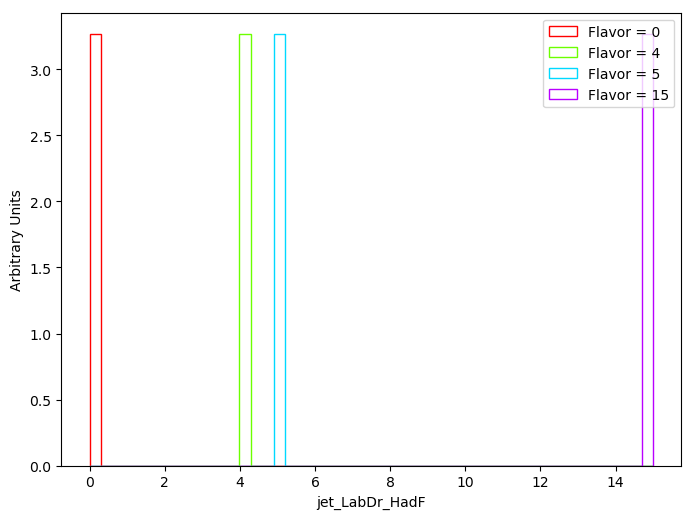

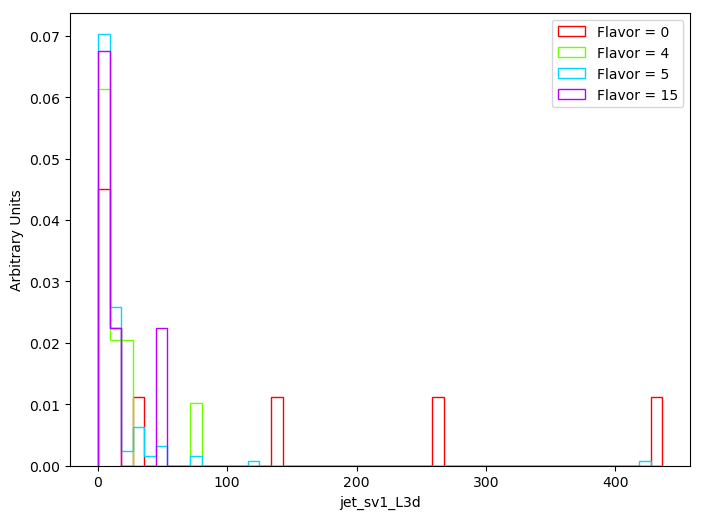

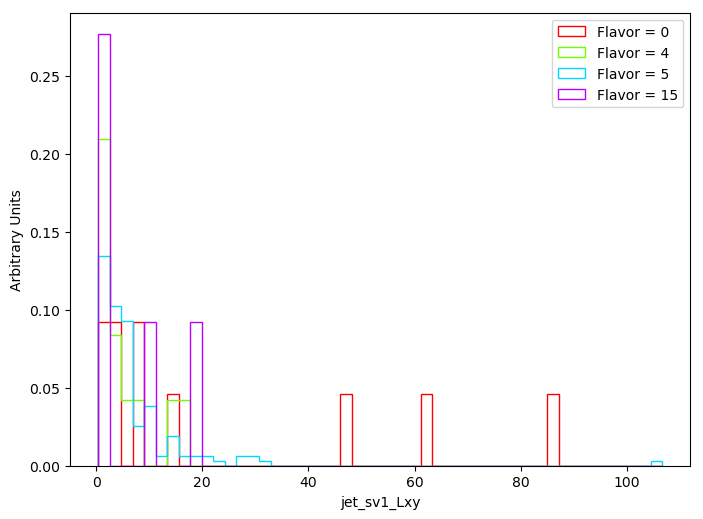

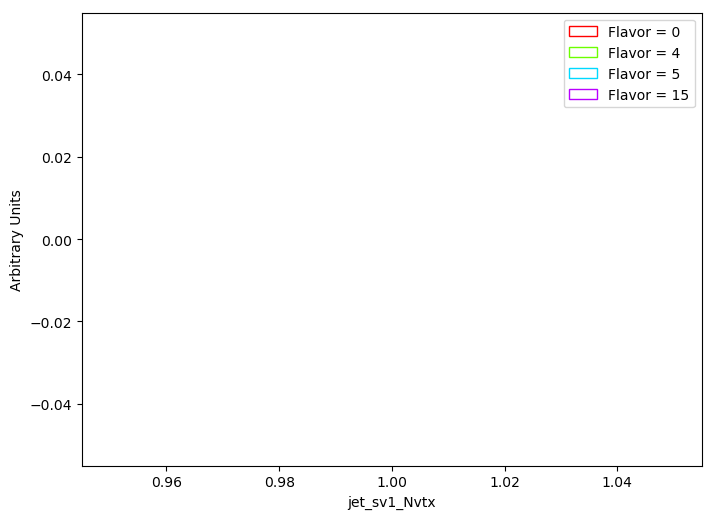

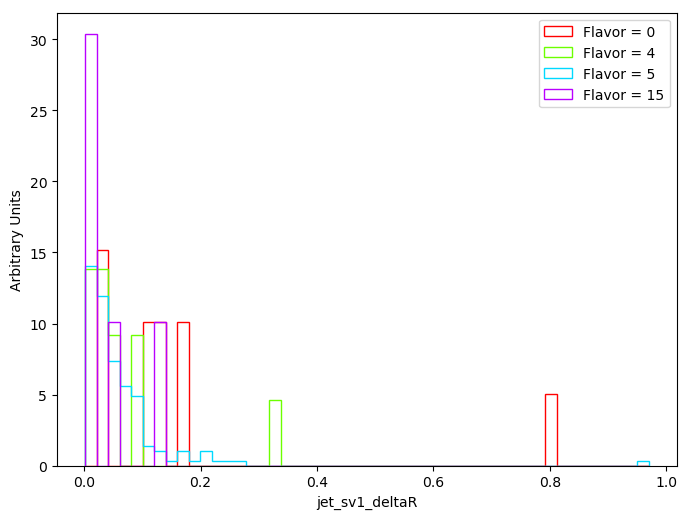

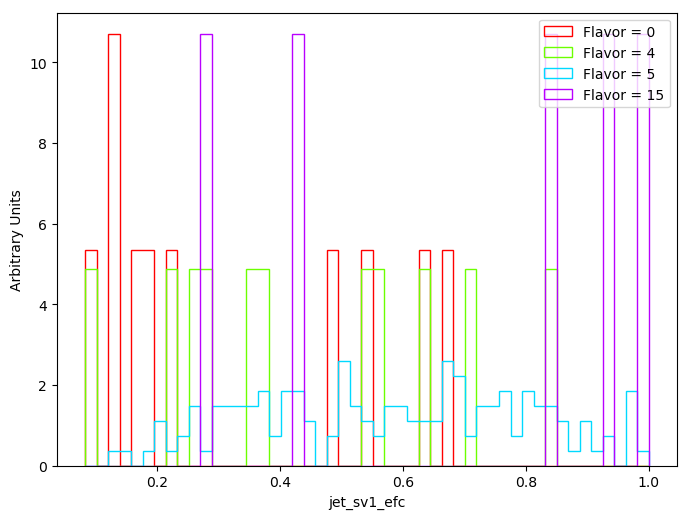

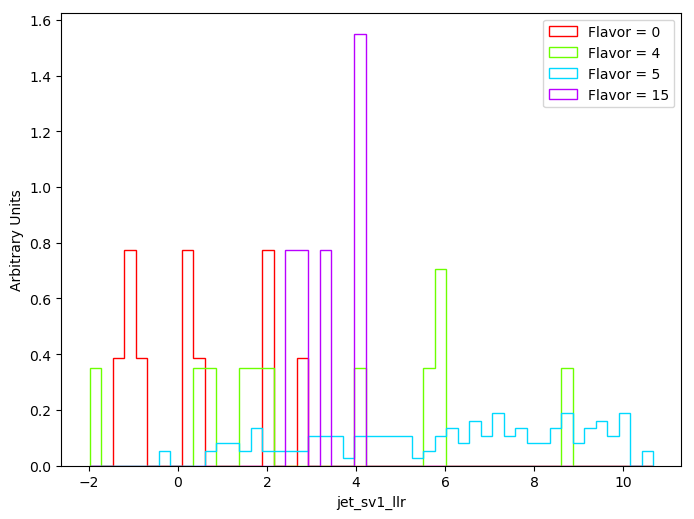

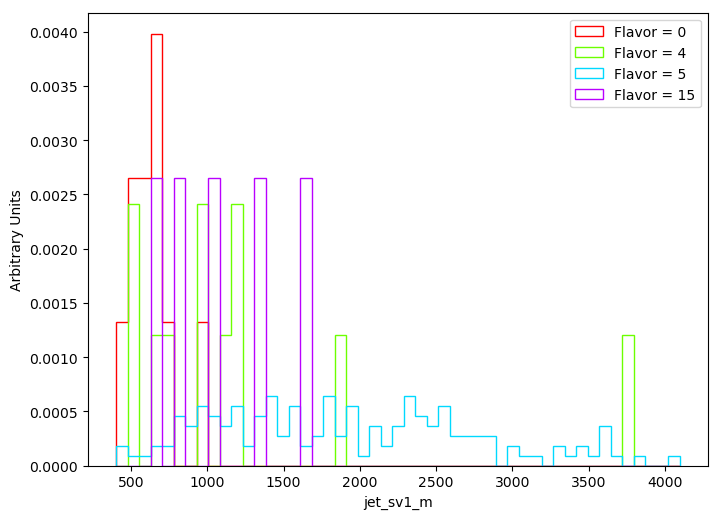

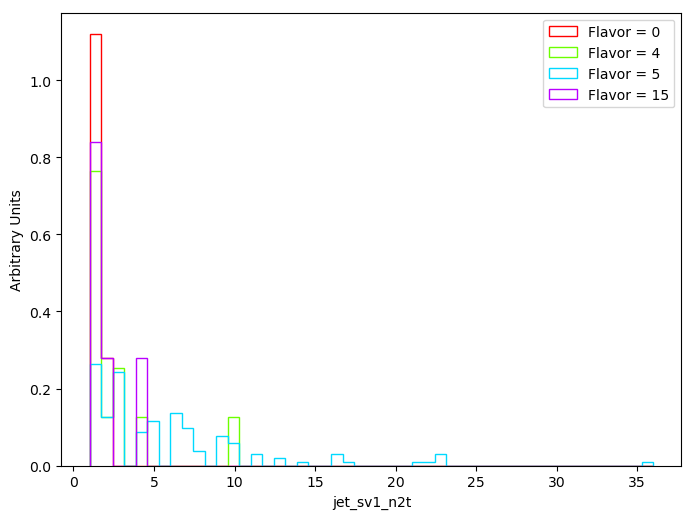

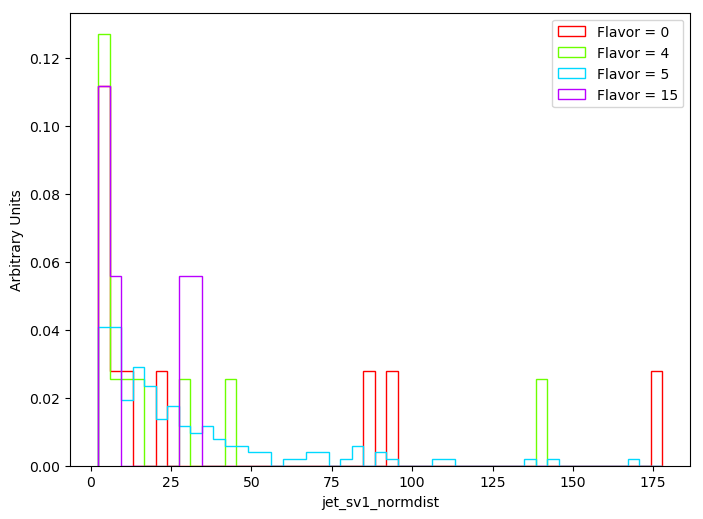

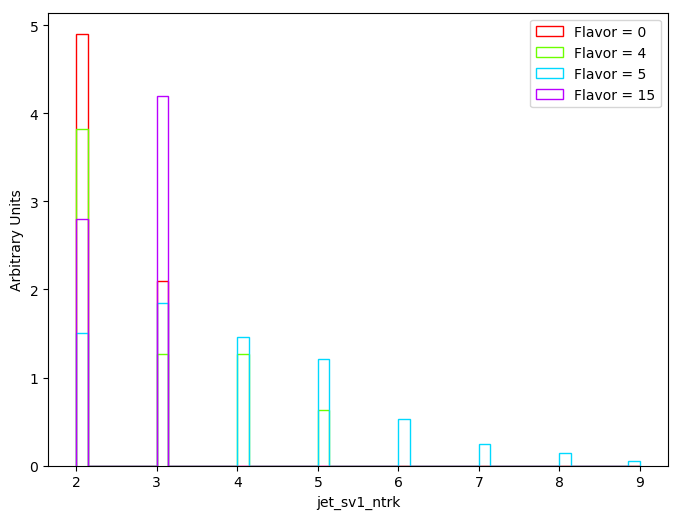

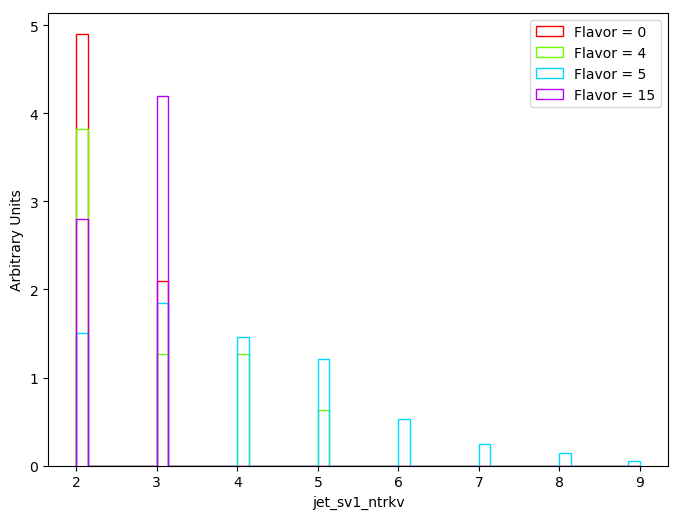

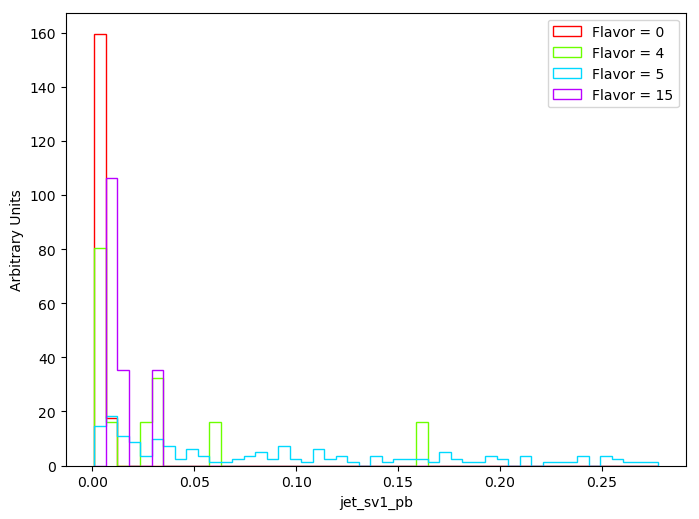

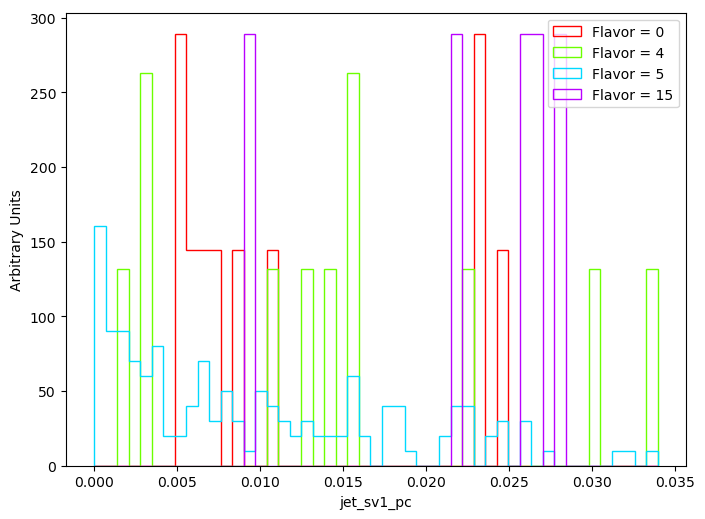

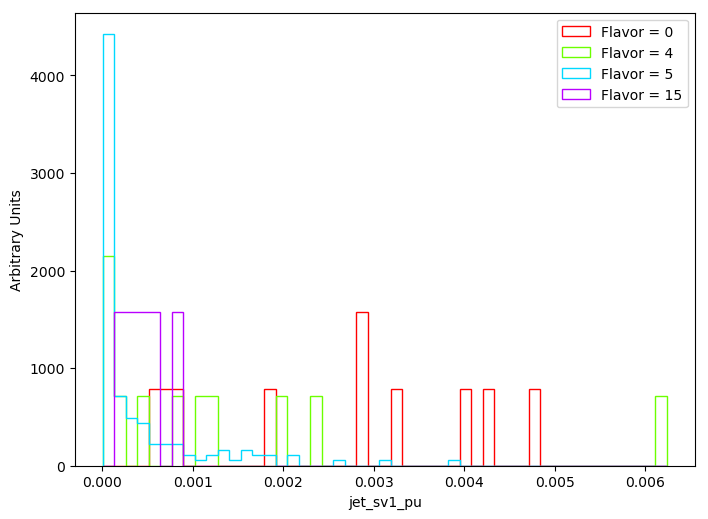

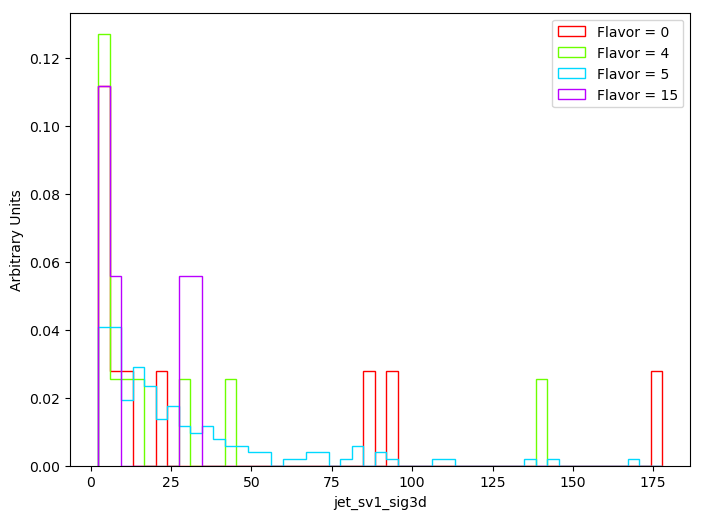

ValueError: color kwarg must have one color per dataset

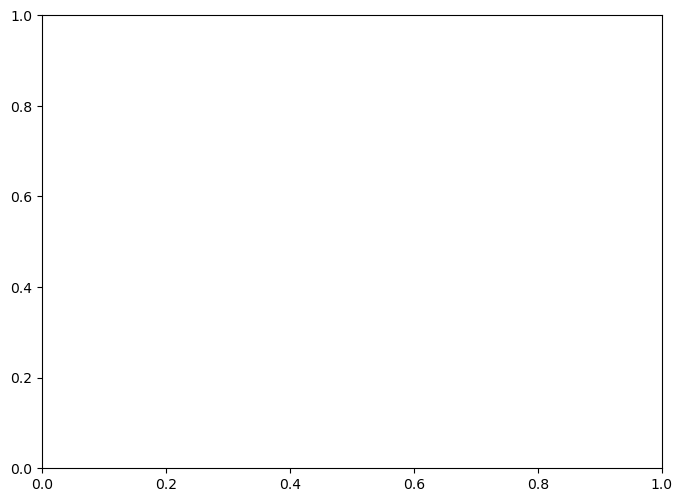

In [115]:
for key in jf_df_flat.keys(): # plot the various variables one by one on different graphs
    
    # set up your figures
    fig = plt.figure(figsize=(8, 6), dpi=100)
    # specify ranges and binning strategies that make sense
    bins = np.linspace(
        min(jf_df_flat[key][jf_df_flat[key]!= -99]), # min
        max(jf_df_flat[key]), # max
        50 # number of bins
    )
    # select your favorite matplotlib color palette
    color = iter(cm.hsv(np.linspace(0, 0.8, len(flavor_pids))))
    # plot the histogram for each flavor using a different color
    
    for k in flavor_pids:
        
        c = next(color)
        _ = plt.hist(jf_df_flat[key][flavor == k][jf_df_flat[key]!= -99], 
                    bins=bins, histtype='step', label='Flavor = {}'.format(k), color=c,
                    normed=True)
        
    # prettify your histograms
    plt.xlabel(key)
    plt.ylabel('Arbitrary Units')
    plt.legend()
    plt.show()


In [117]:
X = jf_df_flat[[key for key in jf_df_flat.keys() if  key!='jet_LabDr_HadF']].as_matrix() # I think this is the same as jf_df_flat.values


In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
from sklearn.model_selection import train_test_split


In [88]:
from sklearn.preprocessing import StandardScaler


In [118]:
le = LabelEncoder()
y = le.fit_transform(flavor)

In [119]:
y

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
ix = range(X.shape[0]) # array of indices, just to keep track of them for safety reasons and future checks

In [121]:
X_train, X_test, y_train, y_test, ix_train, ix_test = train_test_split(X, y, ix, train_size=0.8)

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
X_train

array([[ 0.15930338,  0.72105758,  0.        , ...,  0.11648788,
         0.3032438 ,  2.33976089],
       [-0.17223192, -0.40564521,  0.        , ..., -0.07655382,
        -0.56079168,  0.37602992],
       [ 0.39607261,  0.65465776,  0.        , ...,  0.55564127,
        -0.29010508, -0.30150711],
       ..., 
       [-0.29584892, -0.429339  ,  0.        , ..., -0.17994402,
         0.12960478, -0.14861931],
       [-0.18320914,  0.04271196,  0.        , ...,  0.24160609,
         0.49972349,  0.00807029],
       [-0.23626725, -0.35257187,  0.        , ..., -0.33208094,
        -0.16136371, -0.28590736]])

In [124]:
jf_df.keys()

Index([u'jet_sv1_Nvtx', u'jet_sv1_ntrkv', u'jet_sv1_n2t', u'jet_sv1_m',
       u'jet_sv1_efc', u'jet_sv1_sig3d', u'jet_sv1_normdist',
       u'jet_sv1_deltaR', u'jet_sv1_Lxy', u'jet_sv1_L3d', u'jet_sv1_vtx_x',
       u'jet_sv1_vtx_y', u'jet_sv1_vtx_z', u'jet_LabDr_HadF', u'jet_sv1_pb',
       u'jet_sv1_pc', u'jet_sv1_pu', u'jet_sv1_llr', u'jet_sv1ip3d',
       u'jet_sv1_ntrk'],
      dtype='object')

In [125]:
from keras.datasets.boston_housing import load_data

In [126]:
X_train.shape

(136, 19)

In [127]:
y_train.shape

(136,)

In [128]:
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.utils import plot_model

In [134]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(19, ))

# all Keras Ops look like z = f(z) (like functional programming)
h = Dense(40)(x)
h = Activation('relu')(h)

h = Dense(40)(h)
h = Activation('relu')(h)

# our output is a single number, the house price.
y = Dense(1)(h)

# A model is a conta
net = Model(x, y)

In [135]:
net.compile(optimizer='adam', loss='mse')

In [136]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [137]:
callbacks = [
    # if we don't have a decrease of the loss for 10 epochs, terminate training.
    EarlyStopping(verbose=True, patience=10, monitor='val_loss'), 
    # Always make sure that we're saving the model weights with the best val loss.
    ModelCheckpoint('model.h5', monitor='val_loss', verbose=True, save_best_only=True)]

In [138]:
history = net.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=2, callbacks=callbacks)

Train on 108 samples, validate on 28 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 4.50632, saving model to model.h5
0s - loss: 5.2585 - val_loss: 4.5063
Epoch 2/10
Epoch 00001: val_loss improved from 4.50632 to 3.66760, saving model to model.h5
0s - loss: 4.2368 - val_loss: 3.6676
Epoch 3/10
Epoch 00002: val_loss improved from 3.66760 to 2.95529, saving model to model.h5
0s - loss: 3.3579 - val_loss: 2.9553
Epoch 4/10
Epoch 00003: val_loss improved from 2.95529 to 2.36248, saving model to model.h5
0s - loss: 2.6572 - val_loss: 2.3625
Epoch 5/10
Epoch 00004: val_loss improved from 2.36248 to 1.87469, saving model to model.h5
0s - loss: 2.0830 - val_loss: 1.8747
Epoch 6/10
Epoch 00005: val_loss improved from 1.87469 to 1.48151, saving model to model.h5
0s - loss: 1.6482 - val_loss: 1.4815
Epoch 7/10
Epoch 00006: val_loss improved from 1.48151 to 1.17506, saving model to model.h5
0s - loss: 1.3354 - val_loss: 1.1751
Epoch 8/10
Epoch 00007: val_loss improved from 1.17506 t